In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
data_folder = Path("./titanic")
test_path = data_folder / "test.csv"
train_path = data_folder / "train.csv"

In [10]:
data_original = pd.read_csv(train_path)

In [11]:
data_original.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S


In [12]:
data = data_original.loc[:, ["Age", "Fare"]]

In [13]:
data.isna().sum()

Age     177
Fare      0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.sample(5)

,Age,Fare
802,11.0,120.0000
638,41.0,39.6875
387,36.0,13.0000
630,80.0,30.0000
71,16.0,46.9000


Age
Fare


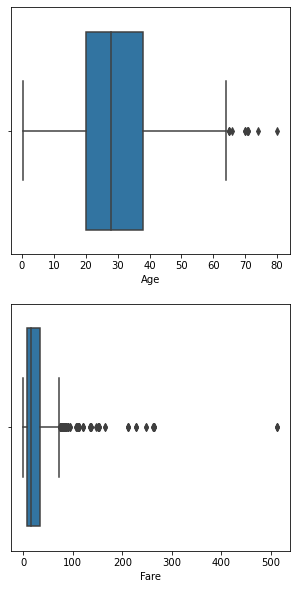

In [17]:
cols = [c for c in data.select_dtypes("number")]

fig, axis = plt.subplots(nrows=len(cols))
fig.set_size_inches(5, 10)

for col, ax in zip(cols, axis):
    print(col)
    sn.boxplot(data=data, x=col, ax=ax)

In [20]:
data.describe()

,Age,Fare
count,714.000000,714.000000
mean,29.699118,34.694514
std,14.526497,52.918930
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,33.375000
max,80.000000,512.329200


In [21]:
scalers = {col: MinMaxScaler().fit(np.asarray(data[col]).reshape(-1, 1))
            for col in ["Age", "Fare"]}

In [22]:
for col, scaler in scalers.items():
    data[col] = scaler.transform(np.asarray(data[col]).reshape(-1, 1))

In [23]:
data.describe()

,Age,Fare
count,714.000000,714.000000
mean,0.367921,0.067719
std,0.182540,0.103291
min,0.000000,0.000000
25%,0.247612,0.015713
50%,0.346569,0.030726
75%,0.472229,0.065144
max,1.000000,1.000000


In [24]:
data.sample(5)

,Age,Fare
352,0.183212,0.014110
668,0.535059,0.015713
236,0.547625,0.050749
268,0.723549,0.299539
712,0.597889,0.101497


In [25]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN, AgglomerativeClustering

In [26]:
def show_cluster(cluster, df):
    df["class"] = cluster.fit_predict(df)

    sn.scatterplot(data=df, hue="class", x="Age", y="Fare")
    plt.show()

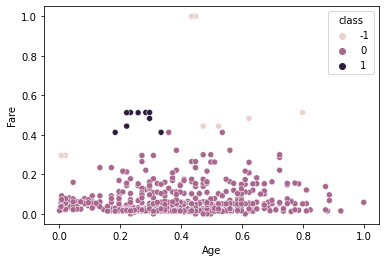

In [27]:
model = DBSCAN(eps=0.1)
show_cluster(model, data)

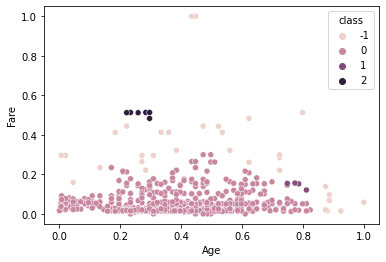

In [28]:
model = DBSCAN(eps=0.05)
show_cluster(model, data)

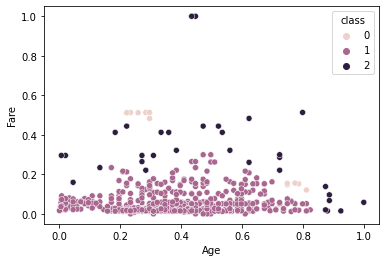

In [29]:
model2 = KMeans(n_clusters=3, random_state=15)
show_cluster(model2, data)

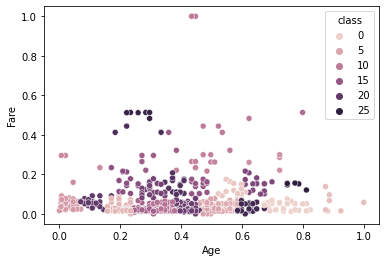

In [30]:
model3 = AffinityPropagation(damping=0.9, random_state=15)
show_cluster(model3, data)

AffinityPropagation не сходиться на нижчих значеннях damping. 

Це означає, що алгоритм не може визначитись, чи можна об'єднати деякі кластери в один і необхідно змінити підхід

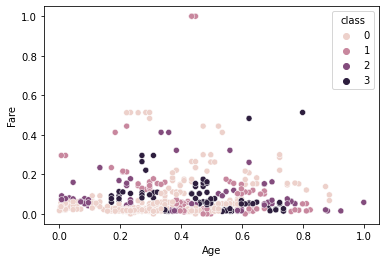

In [33]:
model4 = MeanShift()
show_cluster(model4, data)

MeanShift знаходить нерівномірності у розподілі точок і виділяє їх у спільний кластер, якщо певна точка відноситься більше до однієї групи за щільністю ніж до іншої

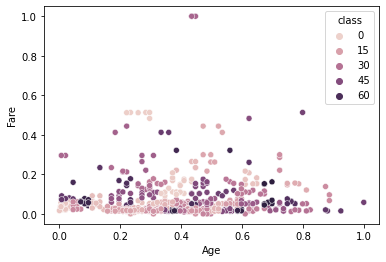

In [32]:
model5 = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=0.1)
show_cluster(model5, data)

З усіх досліджених алгоритмів, DBSCAN показав найкращі результати. 

він знайшов небагато аутлаерів і 3 кластери, 2 з яких були дуже маленькими

Модель 